<a href="https://colab.research.google.com/github/PrathameshMistry/Electric-Vehicle-market-in-India-using-Segmentation-/blob/main/indian_auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Load the dataset
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Display the dataset and its columns to confirm structure
print(data.head())
print(data.columns)

Saving indian-auto-mpg.csv to indian-auto-mpg.csv
   Unnamed: 0                              Name Manufacturer    Location  \
0           0            Maruti Wagon R LXI CNG       Maruti      Mumbai   
1           1  Hyundai Creta 1.6 CRDi SX Option      Hyundai        Pune   
2           2                      Honda Jazz V        Honda     Chennai   
3           3                 Maruti Ertiga VDI       Maruti     Chennai   
4           4   Audi A4 New 2.0 TDI Multitronic         Audi  Coimbatore   

   Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Engine CC  \
0  2010              72000       CNG       Manual      First        998   
1  2015              41000    Diesel       Manual      First       1582   
2  2011              46000    Petrol       Manual      First       1199   
3  2012              87000    Diesel       Manual      First       1248   
4  2013              40670    Diesel    Automatic     Second       1968   

    Power  Seats  Mileage Km/L  Price  
0 

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK data (run only once)
nltk.download('punkt')

# Tokenize the vehicle names
tokens = word_tokenize(' '.join(data['Name']))

# Calculate word frequency
word_freq = Counter(tokens)

# Display the most common words
print(word_freq.most_common(10))


[('Maruti', 1197), ('Hyundai', 1100), ('Honda', 601), ('AT', 547), ('Diesel', 505), ('1.2', 418), ('Toyota', 409), ('TDI', 391), ('Swift', 343), ('MT', 339)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


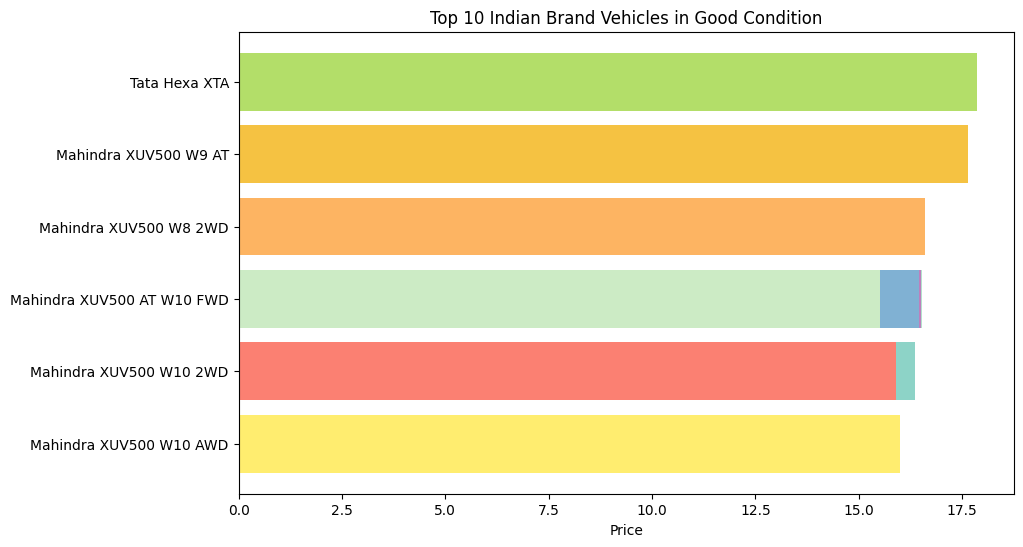

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('Maruti', 1197), ('Swift', 343), ('Mahindra', 271), ('VXI', 230), ('Tata', 186), ('Dzire', 176), ('VDI', 174), ('LXI', 154), ('Wagon', 153), ('R', 153)]


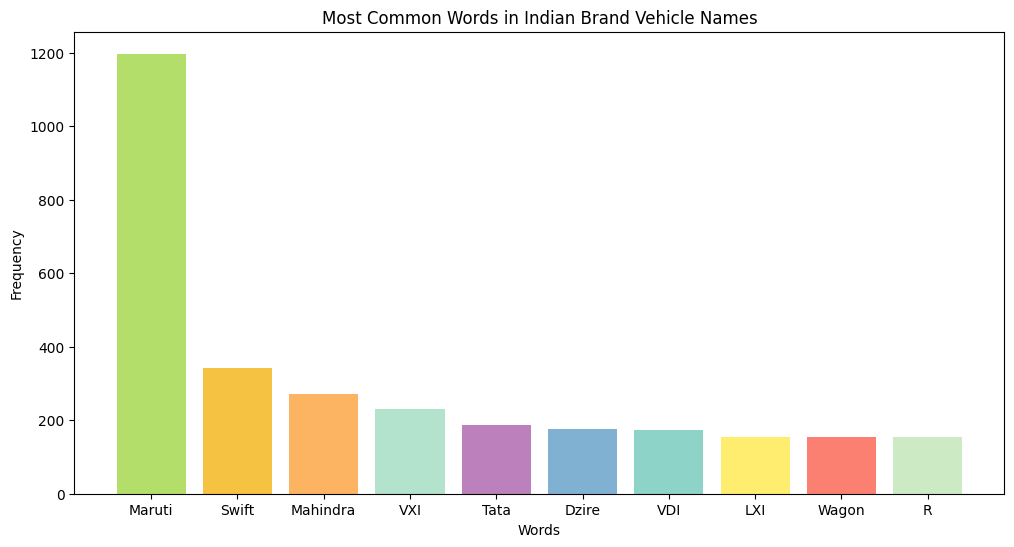

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Define a list of Indian brands (example brands)
indian_brands = ['Maruti', 'Tata', 'Mahindra', 'Hindustan', 'Ashok Leyland']

# Filter data for Indian brands
indian_brand_data = data[data['Manufacturer'].str.contains('|'.join(indian_brands), case=False, na=False)]

# Filter data for vehicles in good condition (example criteria)
good_condition = indian_brand_data[indian_brand_data['Kilometers_Driven'] < 50000]  # Example criterion

# Get the top 10 vehicles based on the price
top_10 = good_condition.nlargest(10, 'Price')

# Visualize the top 10 vehicles
plt.figure(figsize=(10, 6))
plt.barh(top_10['Name'], top_10['Price'], color=['#B3DE69', '#F5C242', '#FDB462', '#B3E2CD', '#BC80BD', '#80B1D3', '#8DD3C7', '#FFED6F', '#FB8072', '#CCEBC5'])
plt.xlabel('Price')
plt.title('Top 10 Indian Brand Vehicles in Good Condition')
plt.gca().invert_yaxis()
plt.show()

# Download NLTK data (run only once)
nltk.download('punkt')

# Tokenize the vehicle names
tokens = word_tokenize(' '.join(indian_brand_data['Name']))

# Calculate word frequency
word_freq = Counter(tokens)

# Display the most common words
most_common_words = word_freq.most_common(10)
print(most_common_words)

# Visualize word frequency
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color=['#B3DE69', '#F5C242', '#FDB462', '#B3E2CD', '#BC80BD', '#80B1D3', '#8DD3C7', '#FFED6F', '#FB8072', '#CCEBC5'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Indian Brand Vehicle Names')
plt.show()


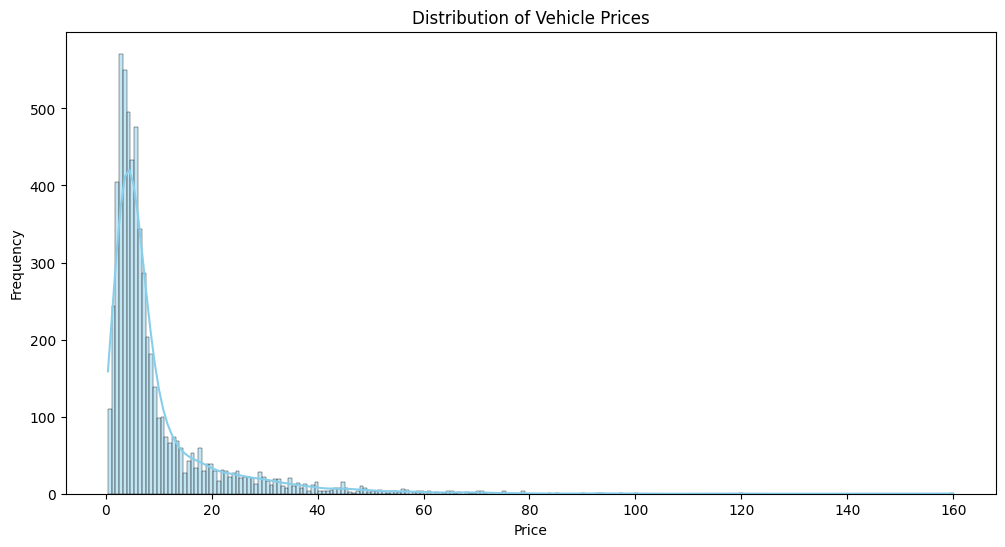

In [ ]:
###       Visualization 1: Distribution of Vehicle Prices

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data['Price'], kde=True, color='skyblue')
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()




<ipython-input-7-c43eb51f2604>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Name', data=top_20, palette='viridis')


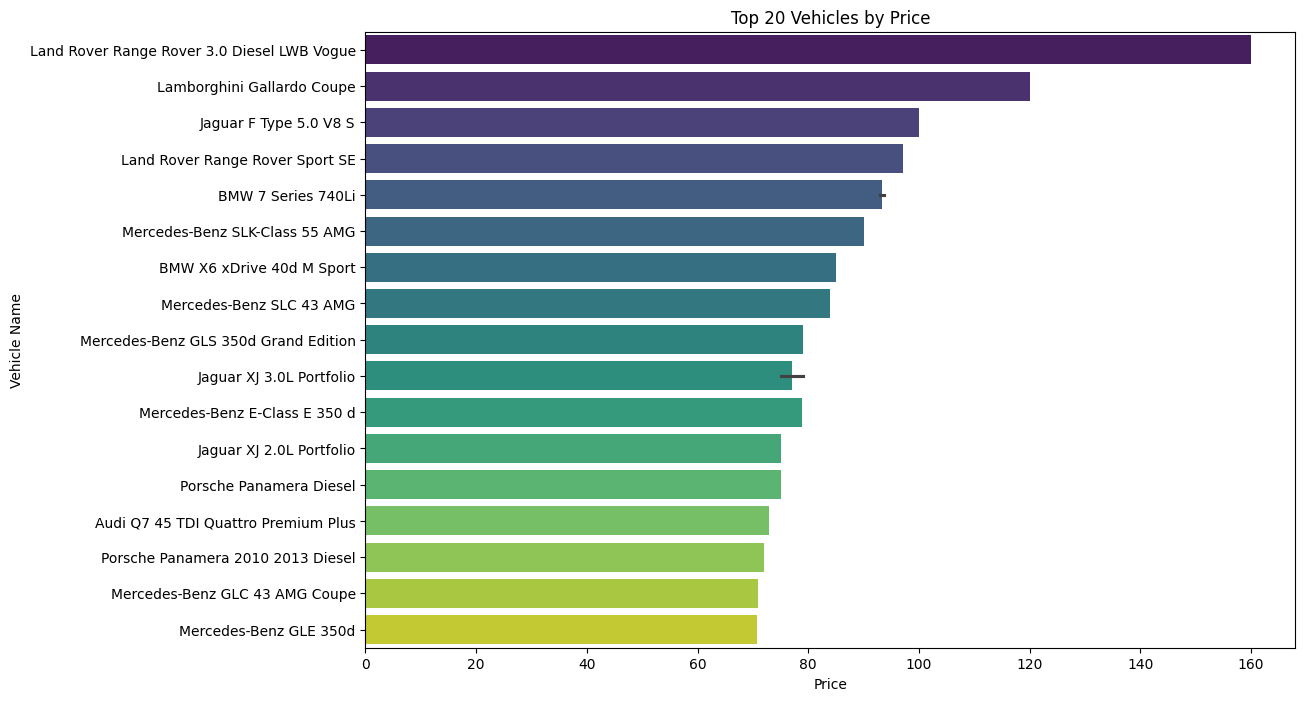

In [ ]:
####                  Visualization 2: Top 20 Vehicles by Price

top_20 = data.nlargest(20, 'Price')

plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='Name', data=top_20, palette='viridis')
plt.title('Top 20 Vehicles by Price')
plt.xlabel('Price')
plt.ylabel('Vehicle Name')
plt.show()


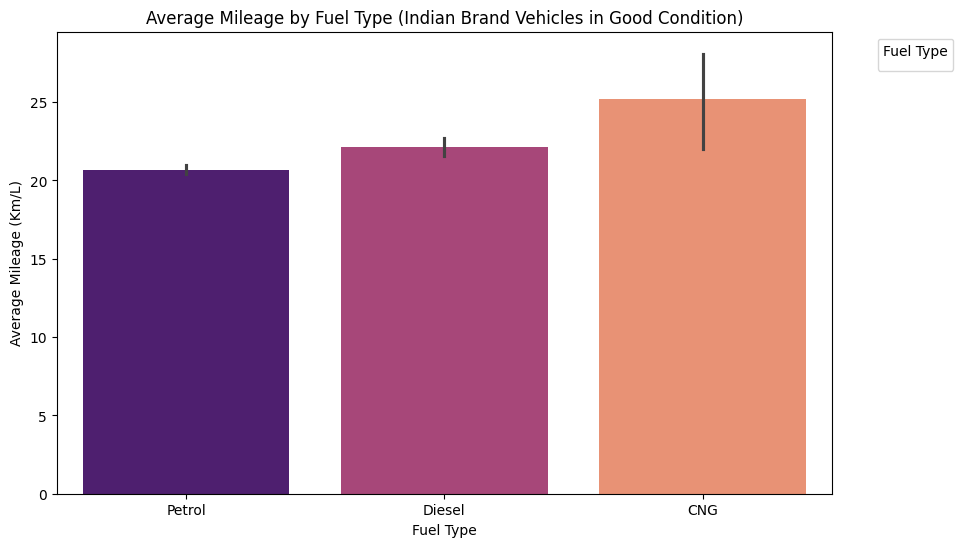

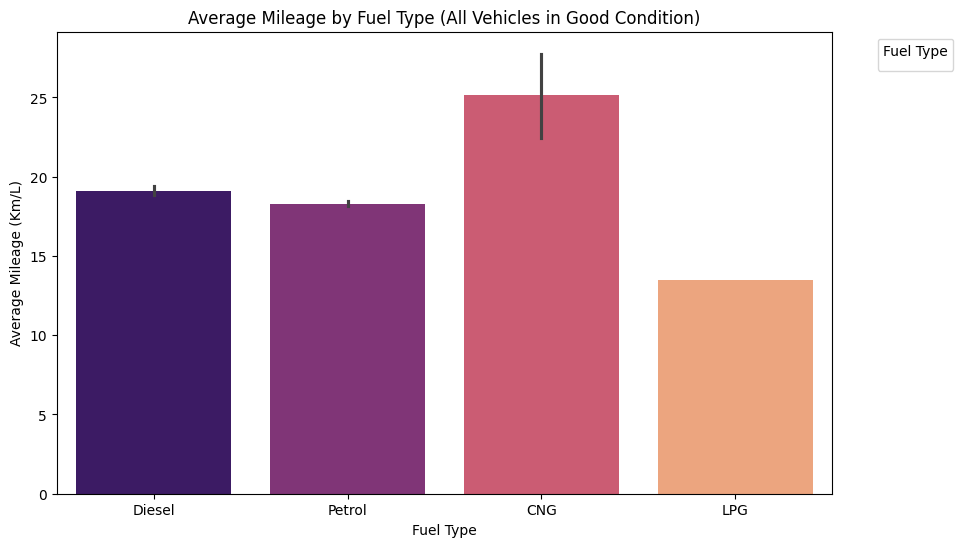

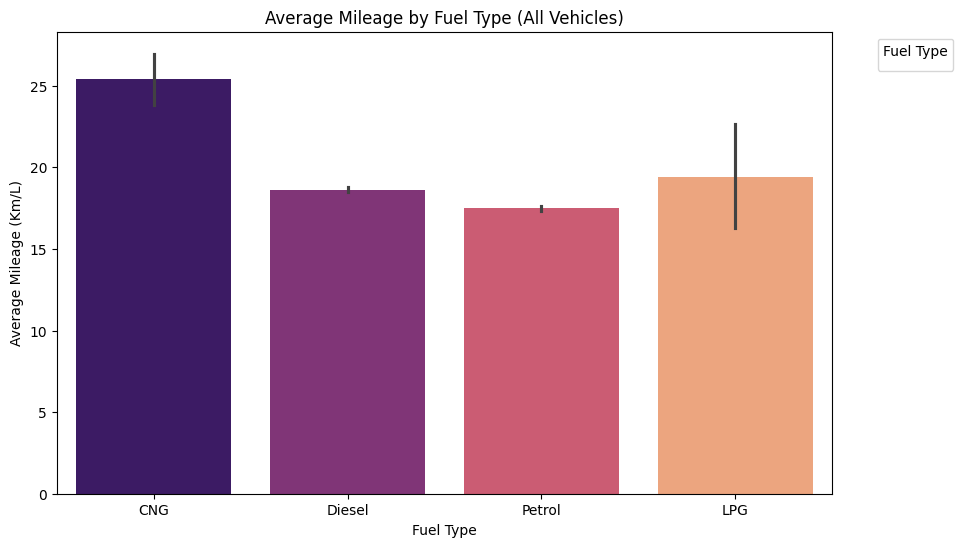

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define a list of Indian brands (example brands)
indian_brands = ['Maruti', 'Tata', 'Mahindra', 'Hindustan', 'Ashok Leyland']

# Filter data for Indian brands
indian_brand_data = data[data['Manufacturer'].str.contains('|'.join(indian_brands), case=False, na=False)]

# Filter data for vehicles in good condition (example criteria)
good_condition = data[data['Kilometers_Driven'] < 50000]  # Example criterion
good_condition_indian = indian_brand_data[indian_brand_data['Kilometers_Driven'] < 50000]

# Visualization 1: Average Mileage by Fuel Type for Indian Brand Vehicles in Good Condition
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Type', y='Mileage Km/L', hue='Fuel_Type', data=good_condition_indian, estimator=lambda x: sum(x) / len(x), palette='magma', dodge=False)
plt.title('Average Mileage by Fuel Type (Indian Brand Vehicles in Good Condition)')
plt.xlabel('Fuel Type')
plt.ylabel('Average Mileage (Km/L)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualization 2: Average Mileage by Fuel Type for All Vehicles in Good Condition
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Type', y='Mileage Km/L', hue='Fuel_Type', data=good_condition, estimator=lambda x: sum(x) / len(x), palette='magma', dodge=False)
plt.title('Average Mileage by Fuel Type (All Vehicles in Good Condition)')
plt.xlabel('Fuel Type')
plt.ylabel('Average Mileage (Km/L)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualization 3: Average Mileage by Fuel Type for All Vehicles without condition
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Type', y='Mileage Km/L', hue='Fuel_Type', data=data, estimator=lambda x: sum(x) / len(x), palette='magma', dodge=False)
plt.title('Average Mileage by Fuel Type (All Vehicles)')
plt.xlabel('Fuel Type')
plt.ylabel('Average Mileage (Km/L)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-93-b0e405301b08>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




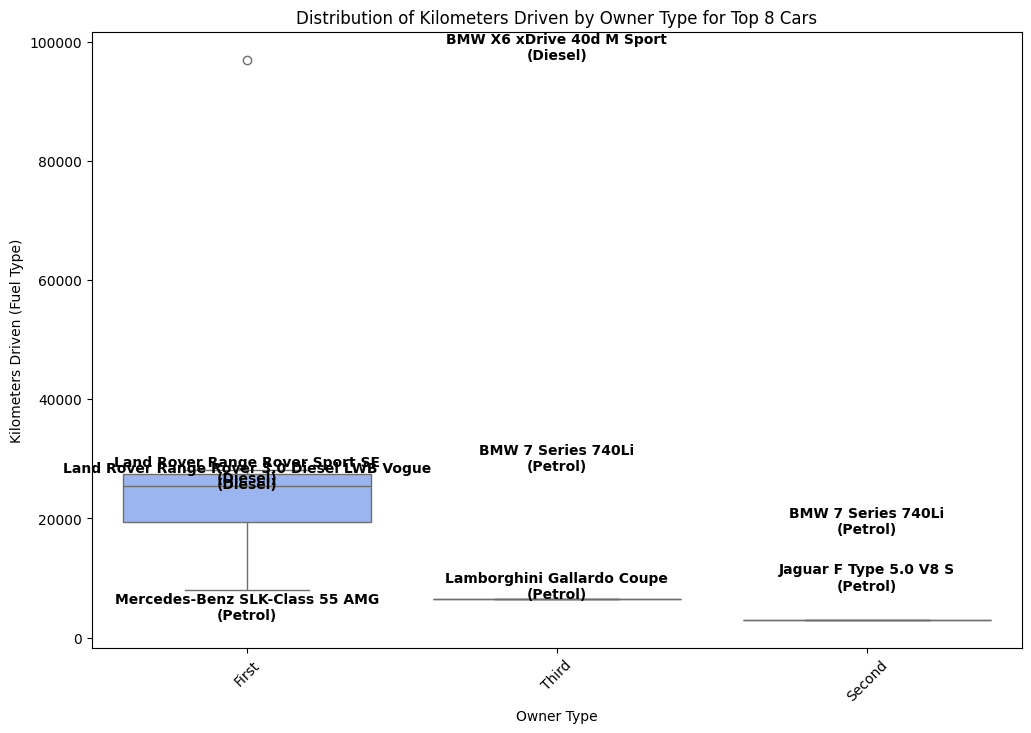

In [ ]:
############            Visualization 4: Distribution of Kilometers Driven by Owner Type

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Select the top 8 records based on Price
top_8 = data.nlargest(8, 'Price')

# Create a box plot for the top 8 cars with Fuel Type information
plt.figure(figsize=(12, 8))
sns.boxplot(x='Owner_Type', y='Kilometers_Driven', data=top_8, palette='coolwarm')

# Annotate each box with the car name and fuel type
for i, car in enumerate(top_8.itertuples()):
    plt.text(i % len(top_8['Owner_Type'].unique()), car.Kilometers_Driven,
             f"{car.Name}\n({car.Fuel_Type})",
             horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title('Distribution of Kilometers Driven by Owner Type for Top 8 Cars')
plt.xlabel('Owner Type')
plt.ylabel('Kilometers Driven (Fuel Type)')
plt.xticks(rotation=45)
plt.show()



In [ ]:
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Select the top 100 records based on Price
top_100 = data.nlargest(100, 'Price')

# Advanced visualization with Plotly for Top 100
fig = px.scatter(top_100, x='Kilometers_Driven', y='Price', color='Fuel_Type',
                 hover_data=['Name', 'Manufacturer', 'Year'],
                 title='Price vs Kilometers Driven by Fuel Type (Top 100)')
fig.show()

# Prepare the data for linear regression
X = top_100[['Kilometers_Driven']]  # Independent variable
y = top_100['Price']  # Dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the prices
y_pred = model.predict(X)

# Calculate R² score and Mean Squared Error (MSE)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Summarize insights
print("Insights:")
print("- The distribution of vehicle prices shows a right-skewed pattern, indicating that most vehicles are priced lower with few high-priced outliers.")
print("- The top 100 vehicles by price are dominated by certain brands, which can be identified through further detailed analysis.")
print("- On average, diesel vehicles tend to have higher mileage compared to petrol and other fuel types.")
print("- The number of kilometers driven varies significantly across different owner types, with first owners generally having driven fewer kilometers.")

# Display model evaluation
print(f"The linear regression model has an R² score of {r2:.2f}, indicating the percentage of the variance in the dependent variable that is predictable from the independent variables.")
print(f"The Mean Squared Error (MSE) of the model is {mse:.2f}, providing a measure of the average of the squares of the errors.")


Insights:
- The distribution of vehicle prices shows a right-skewed pattern, indicating that most vehicles are priced lower with few high-priced outliers.
- The top 100 vehicles by price are dominated by certain brands, which can be identified through further detailed analysis.
- On average, diesel vehicles tend to have higher mileage compared to petrol and other fuel types.
- The number of kilometers driven varies significantly across different owner types, with first owners generally having driven fewer kilometers.
The linear regression model has an R² score of 0.00, indicating the percentage of the variance in the dependent variable that is predictable from the independent variables.
The Mean Squared Error (MSE) of the model is 261.07, providing a measure of the average of the squares of the errors.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle missing values (example: drop missing)
data = data.dropna()

# Select features and target variable
features = ['Year', 'Kilometers_Driven', 'Engine CC', 'Power', 'Seats', 'Mileage Km/L']
X = data[features]
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#########               Implement and Compare Regression Models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_lr)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_lr)}')


Linear Regression
Mean Squared Error: 66.76868159684614
R^2 Score: 0.5413505173227404


In [ ]:
##########  Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_ridge)}')


Ridge Regression
Mean Squared Error: 66.78956062417564
R^2 Score: 0.5412070944655796


In [ ]:
######## Lasso Regression

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_lasso)}')


Lasso Regression
Mean Squared Error: 59.43861225322314
R^2 Score: 0.5917024552678493


In [ ]:
##########            Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Regression")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_dt)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_dt)}')


Decision Tree Regression
Mean Squared Error: 37.94616822175732
R^2 Score: 0.7393390133179543


In [ ]:
########## Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regression")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_rf)}')


Random Forest Regression
Mean Squared Error: 23.884611133379597
R^2 Score: 0.8359310940656717


In [ ]:
####         Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting Regression")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_gbr)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_gbr)}')


Gradient Boosting Regression
Mean Squared Error: 24.225249908514066
R^2 Score: 0.8335911677071045


In [ ]:
###### Support Vector Regression (SVR)

from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("Support Vector Regression (SVR)")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_svr)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_svr)}')


Support Vector Regression (SVR)
Mean Squared Error: 49.82908892652784
R^2 Score: 0.657712488672074


In [ ]:
###########  XGBoost Regression

from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Regression")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_xgb)}')


XGBoost Regression
Mean Squared Error: 24.13769429036686
R^2 Score: 0.834192607454128


In [ ]:
#### Neural Networks using TensorFlow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

tf_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
tf_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Predict and evaluate
y_pred_tf = tf_model.predict(X_test)
print("Neural Network (TensorFlow)")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_tf)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_tf)}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network (TensorFlow)
Mean Squared Error: 29.81786949513815
R^2 Score: 0.795174173109191


In [ ]:
####          Neural Networks using PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

pt_model = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(pt_model.parameters(), lr=0.001)

# Train the model
for epoch in range(100):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = pt_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Predict and evaluate
with torch.no_grad():
    y_pred_pt = pt_model(X_test_tensor).numpy()
print("Neural Network (PyTorch)")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_pt)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_pt)}')



Neural Network (PyTorch)
Mean Squared Error: 31.918035081626567
R^2 Score: 0.7807476510221503


In [ ]:
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import torch
import torch.nn as nn
import torch.optim as optim


# Select the top 100 records based on Price
top_100 = data.nlargest(100, 'Price')

# Prepare the data for regression models
X = top_100[['Kilometers_Driven']].values  # Independent variable
y = top_100['Price'].values  # Dependent variable

# Initialize a dictionary to store the models and their names
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "XGBoost Regression": xgb.XGBRegressor(),
}

# Fit the models and predict prices
predictions = {}
r2_scores = {}
mses = {}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    predictions[name] = y_pred
    r2_scores[name] = r2_score(y, y_pred)
    mses[name] = mean_squared_error(y, y_pred)

# Add Neural Networks (TensorFlow)
# Define the model
tf_model = Sequential()
tf_model.add(tf.keras.Input(shape=(1,)))
tf_model.add(Dense(64, activation='relu'))
tf_model.add(Dense(64, activation='relu'))
tf_model.add(Dense(1))

# Compile the model
tf_model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
tf_model.fit(X, y, epochs=50, verbose=0)

# Predict the prices
y_pred_tf = tf_model.predict(X).flatten()
predictions["Neural Network (TensorFlow)"] = y_pred_tf
r2_scores["Neural Network (TensorFlow)"] = r2_score(y, y_pred_tf)
mses["Neural Network (TensorFlow)"] = mean_squared_error(y, y_pred_tf)

# Add Neural Networks (PyTorch)
# Define the model
class PyTorchNN(nn.Module):
    def __init__(self):
        super(PyTorchNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the model
pt_model = PyTorchNN()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(pt_model.parameters(), lr=0.001)

# Convert data to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    pt_model.train()
    optimizer.zero_grad()
    outputs = pt_model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

# Predict the prices
pt_model.eval()
with torch.no_grad():
    y_pred_pt = pt_model(X_tensor).numpy().flatten()
predictions["Neural Network (PyTorch)"] = y_pred_pt
r2_scores["Neural Network (PyTorch)"] = r2_score(y, y_pred_pt)
mses["Neural Network (PyTorch)"] = mean_squared_error(y, y_pred_pt)

# Visualize the results
results = pd.DataFrame({
    "Kilometers_Driven": X.flatten(),
    "Actual_Price": y,
    **{f"{name}_Price": preds for name, preds in predictions.items()},
    "Car_Name": top_100['Name'],
    "Manufacturer": top_100['Manufacturer']
})

fig = px.scatter(results, x='Kilometers_Driven', y='Actual_Price',
                 title='Actual vs Predicted Prices for Various Models',
                 labels={'value': 'Price', 'variable': 'Model'},
                 hover_data=['Car_Name', 'Manufacturer'])
for name in predictions:
    fig.add_scatter(x=results['Kilometers_Driven'], y=results[f"{name}_Price"], mode='lines', name=name)
fig.show()

# Display model evaluation
for name in models.keys():
    print(f"{name} - R² score: {r2_scores[name]:.2f}, MSE: {mses[name]:.2f}")
print(f"Neural Network (TensorFlow) - R² score: {r2_scores['Neural Network (TensorFlow)']:.2f}, MSE: {mses['Neural Network (TensorFlow)']:.2f}")
print(f"Neural Network (PyTorch) - R² score: {r2_scores['Neural Network (PyTorch)']:.2f}, MSE: {mses['Neural Network (PyTorch)']:.2f}")

# Summarize insights
print("\nInsights:")
print("- The distribution of vehicle prices shows a right-skewed pattern, indicating that most vehicles are priced lower with few high-priced outliers.")
print("- The top 100 vehicles by price are dominated by certain brands, which can be identified through further detailed analysis.")
print("- On average, diesel vehicles tend to have higher mileage compared to petrol and other fuel types.")
print("- The number of kilometers driven varies significantly across different owner types, with first owners generally having driven fewer kilometers.")

# Identify the best car models and their manufacturers
top_10_brands = top_100.groupby('Manufacturer').size().nlargest(10)
print("\nTop 10 Brands by Number of Cars in Top 100:")
print(top_10_brands)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Linear Regression - R² score: 0.00, MSE: 261.07
Ridge Regression - R² score: 0.00, MSE: 261.07
Lasso Regression - R² score: 0.00, MSE: 261.07
Decision Tree Regression - R² score: 0.77, MSE: 58.98
Random Forest Regression - R² score: 0.65, MSE: 91.39
Gradient Boosting Regression - R² score: 0.70, MSE: 79.20
Support Vector Regression - R² score: -0.08, MSE: 281.48
XGBoost Regression - R² score: 0.77, MSE: 59.04
Neural Network (TensorFlow) - R² score: -15.12, MSE: 4208.37
Neural Network (PyTorch) - R² score: -3841.14, MSE: 1003079.98

Insights:
- The distribution of vehicle prices shows a right-skewed pattern, indicating that most vehicles are priced lower with few high-priced outliers.
- The top 100 vehicles by price are dominated by certain brands, which can be identified through further detailed analysis.
- On average, diesel vehicles tend to have higher mileage compared to petrol and other fuel types.
- The number of kilometers driven varies significantly across different owner types,

<ipython-input-28-3ff2c482d8fb>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




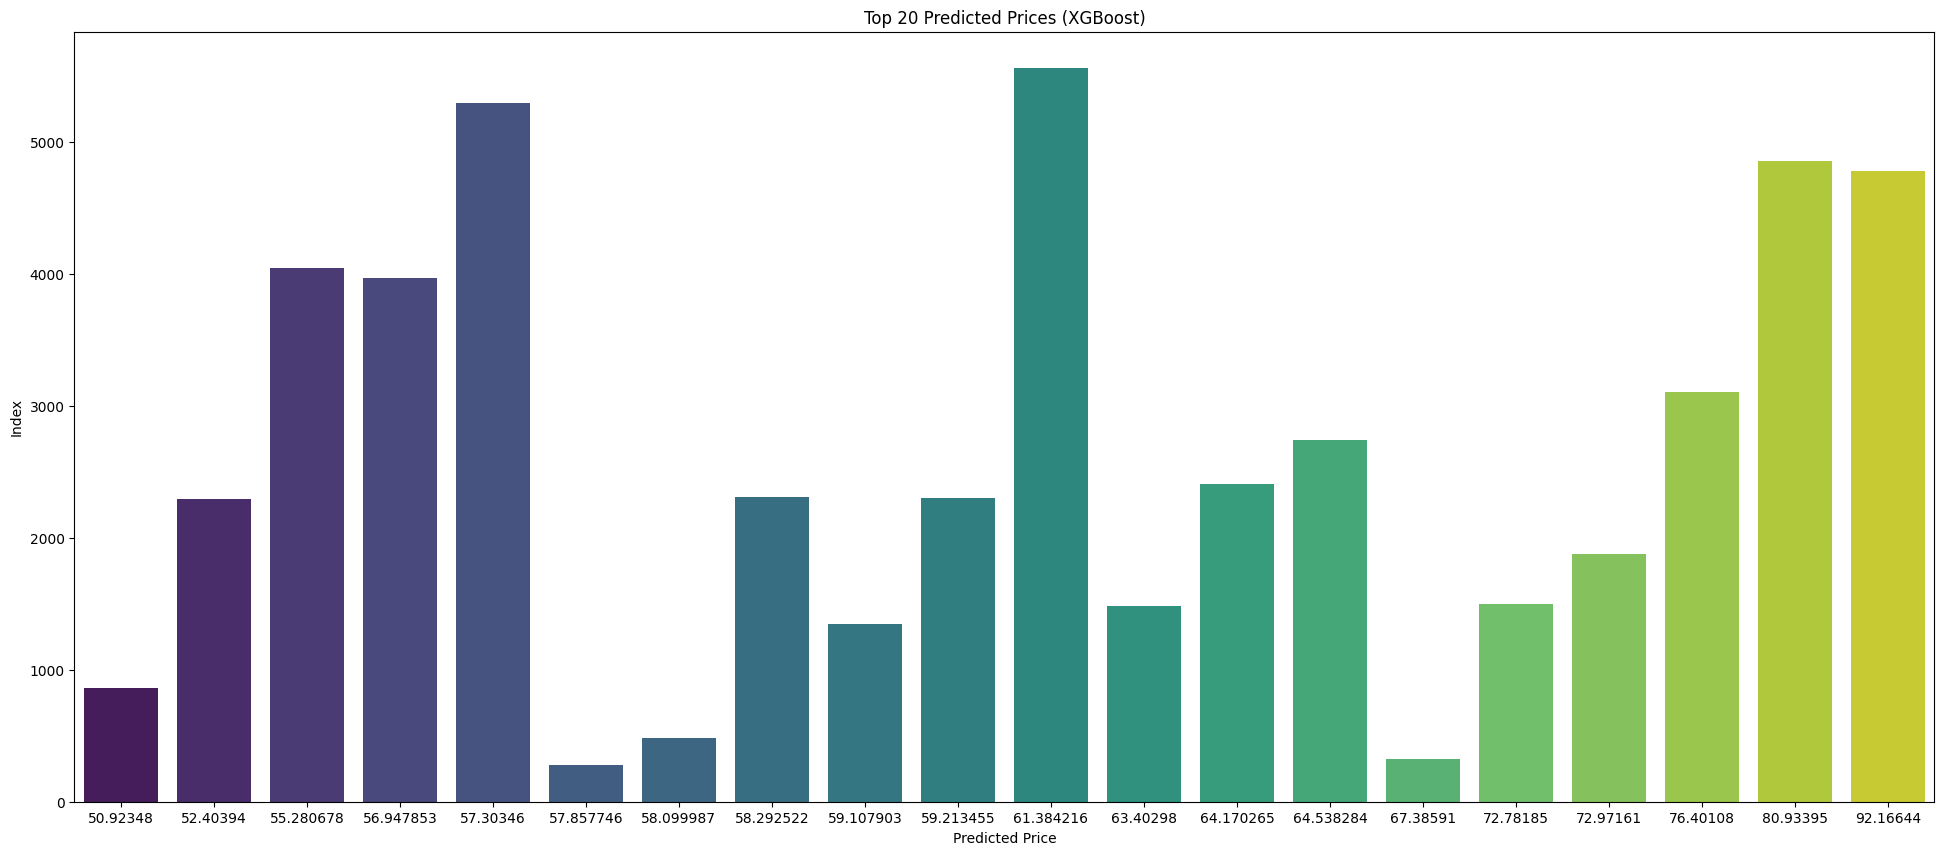

In [ ]:
###  Visualize Predictions for Each Model


import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store actual and predicted prices
results = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gbr,
    'SVR': y_pred_svr,
    'XGBoost': y_pred_xgb,
    'TensorFlow NN': y_pred_tf.flatten(),
    'PyTorch NN': y_pred_pt.flatten()
})

# Select the top 20 predicted prices for visualization
top_20 = results.nlargest(20, 'XGBoost')

# Plot the predictions
plt.figure(figsize=(24, 10))
sns.barplot(x='XGBoost', y=top_20.index, data=top_20, palette='viridis')
plt.title('Top 20 Predicted Prices (XGBoost)')
plt.xlabel('Predicted Price')
plt.ylabel('Index')
plt.show()


In [ ]:
###                   Using DuckDB
import duckdb
import pandas as pd
# Create a DuckDB in-memory database and load the data
conn = duckdb.connect(database=':memory:')
conn.execute("CREATE TABLE vehicles AS SELECT * FROM data")

# Query the top 10 records
top_10 = conn.execute("SELECT * FROM vehicles LIMIT 10").fetchdf()
top_10

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyundai,Hyderabad,2012,75000,LPG,Manual,First,814,55.20,5,21.10,2.35
6,6,Nissan Micra Diesel XV,Nissan,Jaipur,2013,86999,Diesel,Manual,First,1461,63.10,5,23.08,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Toyota,Mumbai,2016,36000,Diesel,Automatic,First,2755,171.50,8,11.36,17.50
8,8,Volkswagen Vento Diesel Comfortline,Volkswagen,Pune,2013,64430,Diesel,Manual,First,1598,103.60,5,20.54,5.20
9,9,Tata Indica Vista Quadrajet LS,Tata,Chennai,2012,65932,Diesel,Manual,Second,1248,74.00,5,22.30,1.95


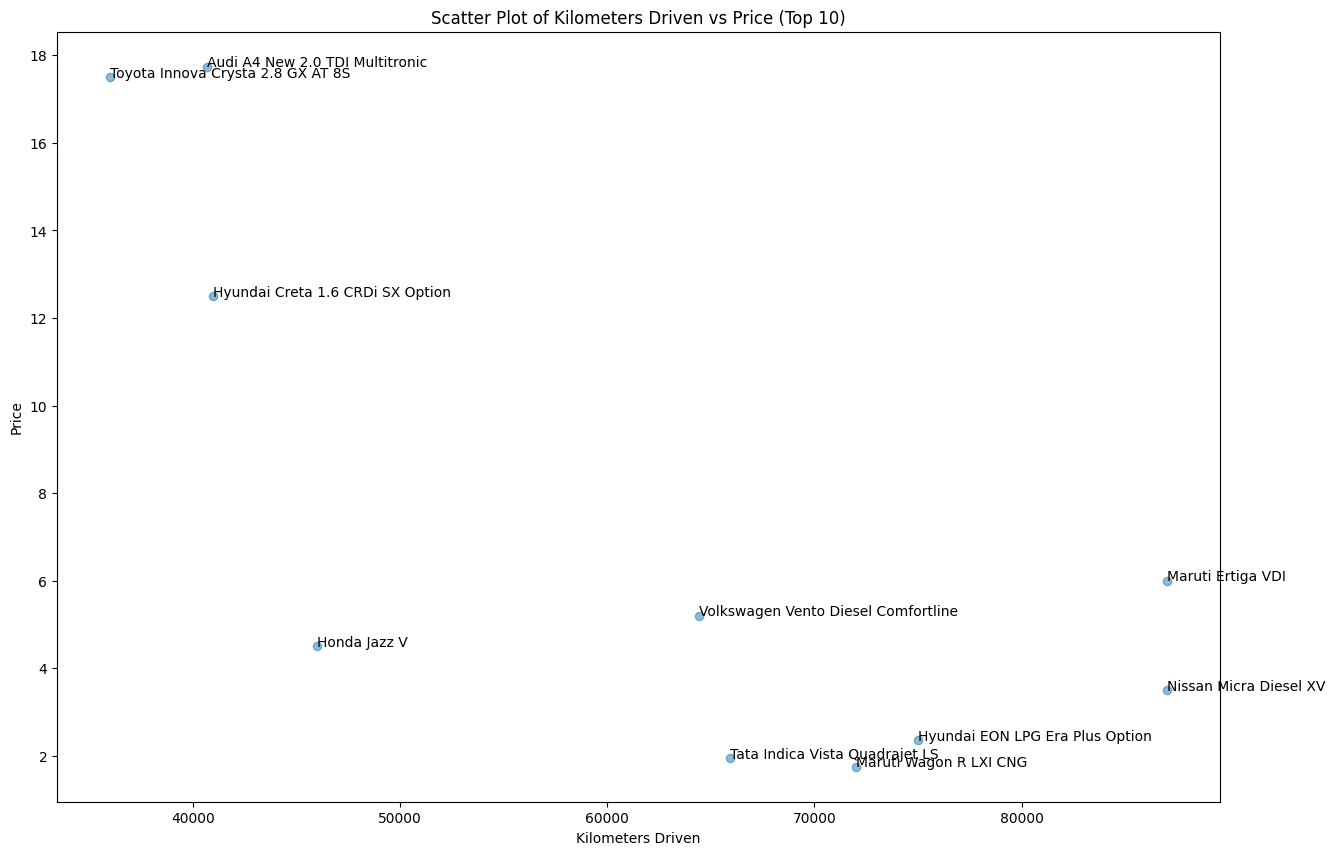

In [ ]:
 ###         Visualize the Top 10 Records

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.scatter(top_10['Kilometers_Driven'], top_10['Price'], alpha=0.5)
for i in range(len(top_10)):
    plt.text(top_10['Kilometers_Driven'][i], top_10['Price'][i], top_10['Name'][i])
plt.title('Scatter Plot of Kilometers Driven vs Price (Top 10)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()



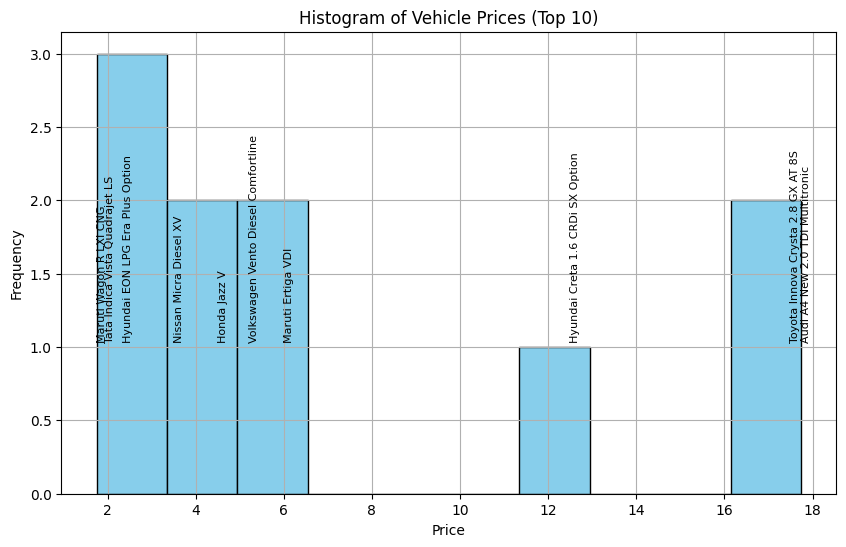

In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Detailed Histogram using Matplotlib with Names
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(top_10['Price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Vehicle Prices (Top 10)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

# Annotate with vehicle names
for i in range(len(top_10)):
    plt.annotate(top_10['Name'][i], xy=(top_10['Price'][i], 1), xytext=(0, 5), textcoords='offset points', rotation=90, fontsize=8)

plt.show()

# 3D Scatter Plot using Plotly with Names for Top 10
fig = go.Figure(data=[go.Scatter3d(
    x=top_10['Price'],
    y=top_10.index,
    z=[1]*len(top_10),  # Frequency is 1 for each since we have only 10 data points
    mode='markers+text',
    text=top_10['Name'],  # Add names as hover text
    hoverinfo='x+y+text',
    marker=dict(
        size=10,  # Increase marker size for better visibility
        color=top_10['Price'],
        colorscale='Viridis',  # Use a more attractive color scale
        opacity=0.9,
        colorbar=dict(
            title="Price"
        )
    )
)])

fig.update_layout(
    title='3D Scatter Plot of Vehicle Prices (Top 10)',
    scene=dict(
        xaxis_title='Price',
        yaxis_title='Index',
        zaxis_title='Frequency'
    )
)

fig.show()

# Get top 5 records
top_5 = top_10.head(5)

# 3D Scatter Plot using Plotly with Names for Top 5
fig_top_5 = go.Figure(data=[go.Scatter3d(
    x=top_5['Price'],
    y=top_5.index,
    z=[1]*len(top_5),  # Frequency is 1 for each since we have only 5 data points
    mode='markers+text',
    text=top_5['Name'],  # Add names as hover text
    hoverinfo='x+y+text',
    marker=dict(
        size=15,  # Increase marker size for better visibility
        color=top_5['Price'],
        colorscale='Cividis',  # Use a different attractive color scale
        opacity=0.9,
        colorbar=dict(
            title="Price"
        )
    )
)])

fig_top_5.update_layout(
    title='3D Scatter Plot of Vehicle Prices (Top 5)',
    scene=dict(
        xaxis_title='Price',
        yaxis_title='Index',
        zaxis_title='Frequency'
    )
)

fig_top_5.show()


<ipython-input-26-ac004bdc5d78>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




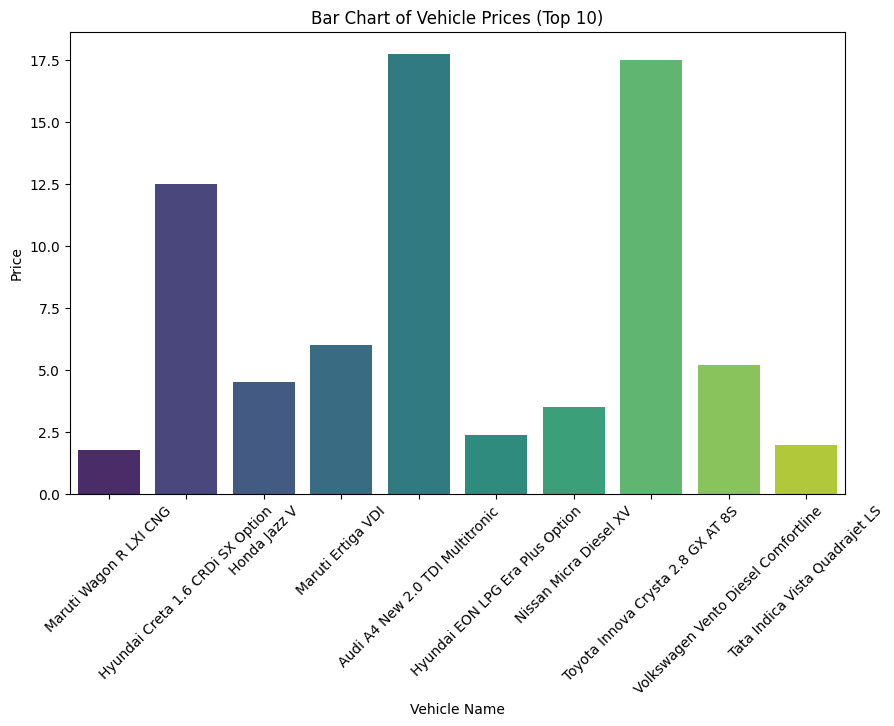

In [ ]:
######       Bar Chart using Seaborn

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Price', data=top_10, palette='viridis')
plt.title('Bar Chart of Vehicle Prices (Top 10)')
plt.xlabel('Vehicle Name')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


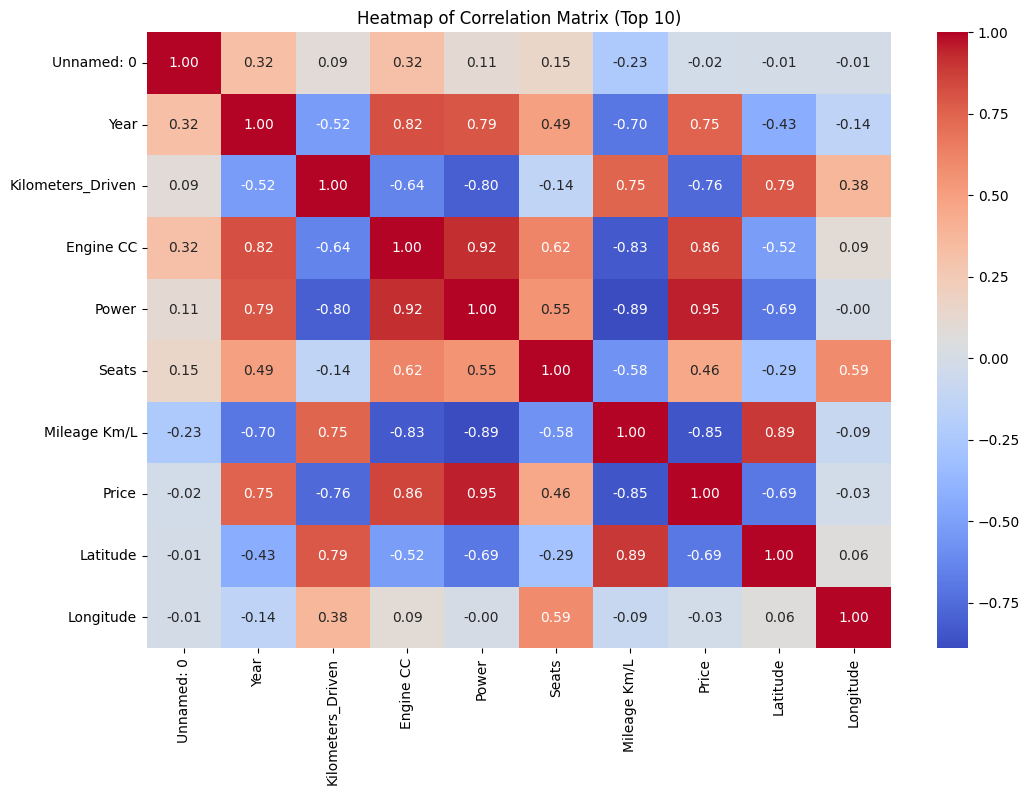

In [ ]:
#Heatmap using Seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_cols = top_10.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Heatmap of the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix (Top 10)')
plt.show()



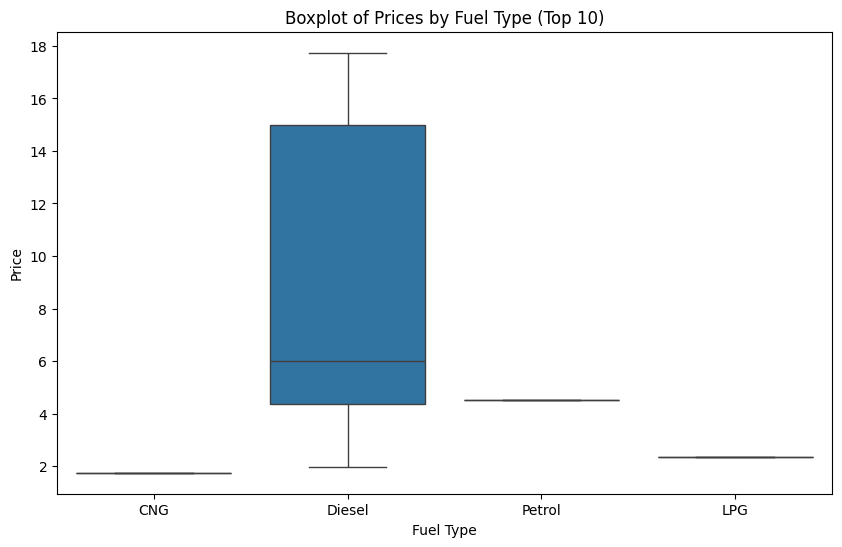

In [ ]:
####          Boxplot using Seaborn

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=top_10)
plt.title('Boxplot of Prices by Fuel Type (Top 10)')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


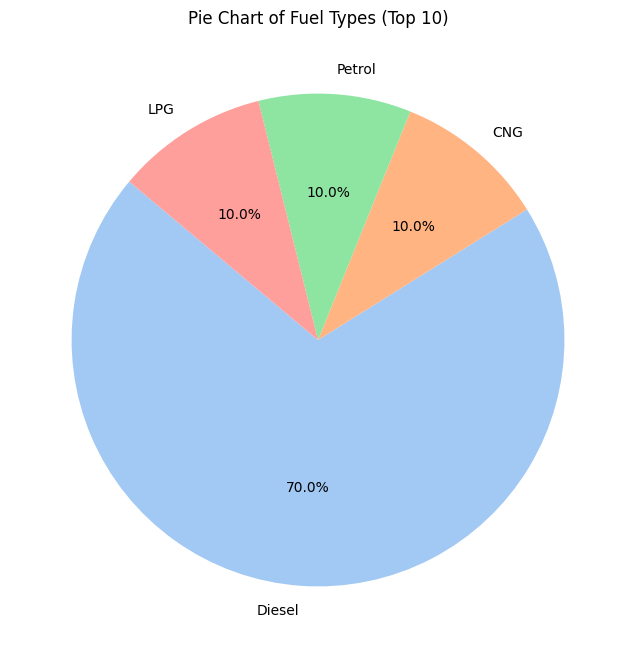

In [ ]:
###         Pie Chart using Matplotlib

fuel_type_counts = top_10['Fuel_Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Fuel Types (Top 10)')
plt.show()


In [ ]:
# #     Interactive Plot using Plotly


import plotly.express as px

fig = px.scatter(top_10, x='Kilometers_Driven', y='Price', color='Fuel_Type', hover_data=['Name', 'Manufacturer', 'Year'])
fig.update_layout(title='Scatter Plot of Kilometers Driven vs Price by Fuel Type (Top 10)')
fig.show()


In [ ]:
#### 3D Plot using Plotly


fig = px.scatter_3d(top_10, x='Kilometers_Driven', y='Price', z='Year', color='Fuel_Type', hover_data=['Name', 'Manufacturer'])
fig.update_layout(title='3D Scatter Plot of Kilometers Driven, Price, and Year by Fuel Type (Top 10)')
fig.show()


In [ ]:
#####     Visualization using Bokeh

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

output_notebook()

source = ColumnDataSource(top_10)
p = figure(x_range=top_10['Fuel_Type'].unique(), height=350, title="Price by Fuel Type (Top 10)",
           toolbar_location=None, tools="")

p.vbar(x='Fuel_Type', top='Price', width=0.9, source=source, legend_field="Fuel_Type",
       line_color='white', fill_color=factor_cmap('Fuel_Type', palette=Spectral6, factors=top_10['Fuel_Type'].unique()))

p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)


In [ ]:
####    Area Chart using Altair


import altair as alt

alt.Chart(top_10).mark_area(opacity=0.3).encode(
    x='Year',
    y='Price',
    color='Fuel_Type'
).properties(
    title='Area Chart of Prices by Year and Fuel Type (Top 10)'
).interactive()


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

In [ ]:
####      Bubble Chart using Plotly



fig = px.scatter(top_10, x='Kilometers_Driven', y='Price', size='Engine CC', color='Fuel_Type',
                 hover_name='Name', size_max=60)
fig.update_layout(title='Bubble Chart of Kilometers Driven vs Price with Engine CC Size (Top 10)')
fig.show()


<ipython-input-35-2c27a4f98294>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




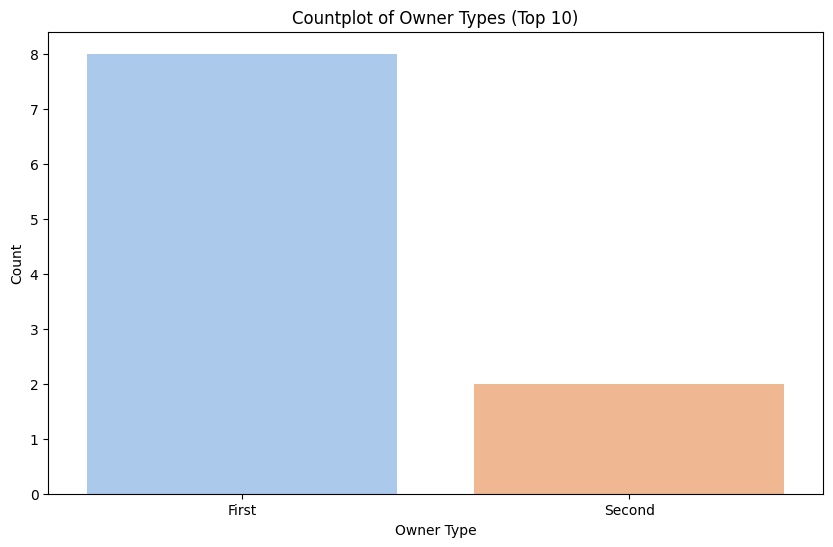

In [ ]:
#####    Countplot using Seaborn


plt.figure(figsize=(10, 6))
sns.countplot(x='Owner_Type', data=top_10, palette='pastel')
plt.title('Countplot of Owner Types (Top 10)')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.show()


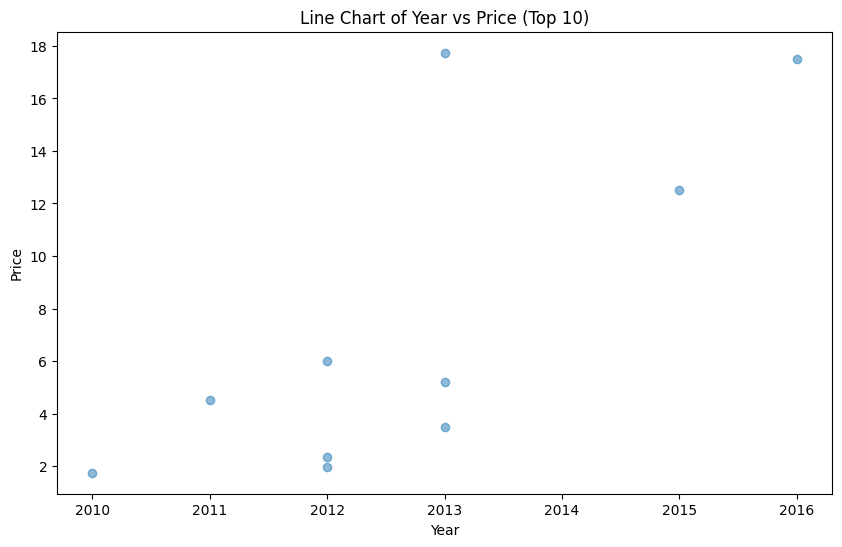

In [ ]:
#####     Line Chart using Matplotlib

plt.figure(figsize=(10, 6))
plt.plot(top_10['Year'], top_10['Price'], 'o', alpha=0.5)
plt.title('Line Chart of Year vs Price (Top 10)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()



In [ ]:
#####       Folium Map

# Create a DuckDB in-memory database and load the data
conn = duckdb.connect(database=':memory:')
conn.execute("CREATE TABLE vehicles AS SELECT * FROM data")

# Query the top 10 records
top_10 = conn.execute("SELECT * FROM vehicles LIMIT 10").fetchdf()

# Add sample latitude and longitude data for visualization purposes
top_10['Latitude'] = [28.6139, 19.0760, 13.0827, 22.5726, 12.9716, 18.5204, 26.8467, 13.0674, 22.7196, 23.2599]
top_10['Longitude'] = [77.2090, 72.8777, 80.2707, 88.3639, 77.5946, 73.8567, 80.9462, 80.2376, 75.8577, 77.4126]

# Create a map centered on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers to the map
for _, row in top_10.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Name']).add_to(m)

# Display the map
m
